### Problem 1

a) Code the Conjugate Gradient Method and apply it to solve a simple $$Hx=b$$ system, with H’s dimension as 10×10.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Threshhold for the gradient for termination
epsilon_threshhold = 0.001

def conjugate_gradient(H,b,initial_point = np.array([[3],[1]])):

    x_k = initial_point
    # Compute gradient
    r_k = np.matmul(H,initial_point) - b
    # Descent Direction
    p_k = -r_k
    
    iterations = 0
    iterates = []
    iterates.append(x_k.copy())
    while np.linalg.norm(r_k) > epsilon_threshhold:
        
        # Calculate the exact step length to take in the descent direction
        a_k_num = -np.matmul(r_k.T,p_k)
        a_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        a_k = a_k_num / a_k_denom

        # Perform Descent
        x_k = x_k + a_k*p_k

        # Compute the gradient at the newly arrived point
        r_k = np.matmul(H,x_k) - b

        # Calculating beta_k such that p_(k-1) and p_k are conjguate with respect to H
        b_k_num = np.matmul(p_k.T,np.matmul(H,r_k))
        b_k_denom = np.matmul(p_k.T,np.matmul(H,p_k))
        b_k = b_k_num / b_k_denom

        # The new Conjugate Descent Direction
        p_k = -r_k + b_k*p_k
        iterates.append(x_k.copy())
        iterations+=1
        
    return iterations,x_k,iterates

In [2]:
# H (10*10 Matrix)
H = np.array([ [27,    4,    -4,   -12,    -3,    -3,     6,   -13,     5,     9],
               [4,    12,     5,    -7,    -7,    -8,    -8,    -9,     3,    -2,],
               [-4,    5,    18,     3,    -6,    -7,     3,     6,    -1,     3],
               [-12,  -7,     3,    22,     6,     6,     1,    10,    -2,   -15],
               [-3,   -7,    -6,     6,    23,     4,     7,    12,    -7,    -1],
               [-3,   -8,    -7,     6,     4,    20,     5,     1,     0,    -3],
               [6,    -8,     3,     1,     7,     5,    22,     2,    -5,    10],
               [-13,  -9,     6,    10,    12,     1,     2,    27,    -8,     3],
               [5,     3,    -1,    -2,    -7,     0,    -5,    -8,    14,    -2],
               [9,    -2,     3,   -15,    -1,    -3,    10,     3,    -2,    25]])


b = np.array([ [-67],[-264],[27],[199],[323],[218],[316],[356],[-121],[120]])
initial_point = np.zeros((10,1))
iterations, ans , iterates = conjugate_gradient(H,b,initial_point)

lib_ans = np.linalg.solve(H,b)

print("Solution returned by Conjugate Gradient custom implementation")
print("--------")
print(str(ans))
print("\nSolution returned by numpy.linalg.solve")
print("--------")
print(str(lib_ans))

Solution returned by Conjugate Gradient custom implementation
--------
[[ 1.99999995e+00]
 [-3.11658335e-08]
 [ 1.00000000e+00]
 [ 5.00000005e+00]
 [ 6.00000004e+00]
 [ 7.00000002e+00]
 [ 8.00000001e+00]
 [ 9.00000006e+00]
 [ 2.99999998e+00]
 [ 3.99999998e+00]]

Solution returned by numpy.linalg.solve
--------
[[2.00000000e+00]
 [1.39481464e-12]
 [1.00000000e+00]
 [5.00000000e+00]
 [6.00000000e+00]
 [7.00000000e+00]
 [8.00000000e+00]
 [9.00000000e+00]
 [3.00000000e+00]
 [4.00000000e+00]]


b) Construct  matrices  with  various  eigenvalue  distributions  (clustered  and  non-clustered)and apply the above CG method to them.  Comment on the behaviour of the CG method in terms of convergence.

In [3]:
clustered_H = np.array([[ 1.39483303,  0.07722347,  0.02239186, -0.08948538,  0.09937066, -0.11190367,  0.05140957, -0.02461725, -0.00884831],
                       [ 0.07722347,  1.29643756, -0.0584237 ,  0.08280484,  0.02913479, -0.00234796, -0.01233273,  0.09293059,  0.07818916],
                       [ 0.02239186, -0.0584237 ,  1.31438343,  0.00585098,  0.05210147, -0.08849494, -0.10609887,  0.05051076, -0.06765619],
                       [-0.08948538,  0.08280484,  0.00585098,  1.45607645, -0.01753098,  0.01500413,  0.03735634, -0.0252064 , -0.09095963],
                       [ 0.09937066,  0.02913479,  0.05210147, -0.01753098,  1.29421765,  0.11667466, -0.13008429, -0.10317063,  0.07007971],
                       [-0.11190367, -0.00234796, -0.08849494,  0.01500413,  0.11667466,  1.23335634, -0.01660951, -0.0403706 ,  0.06972046],
                       [ 0.05140957, -0.01233273, -0.10609887,  0.03735634, -0.13008429, -0.01660951,  1.21876815, -0.08396157, -0.06122478],
                       [-0.02461725,  0.09293059,  0.05051076, -0.0252064 , -0.10317063, -0.0403706 , -0.08396157,  1.27702921,  0.05919603],
                       [-0.00884831,  0.07818916, -0.06765619, -0.09095963,  0.07007971,  0.06972046, -0.06122478,  0.05919603,  1.24089818]])

non_clustered_H = np.array([[ 2.92585425e+00,  4.36120408e-01,  1.39704153e-01, -5.39244412e-01,  5.18248845e-01, -6.34121451e-01, 1.98142174e-01, -4.20478870e-02, -1.18921648e-01],
                            [ 4.36120408e-01,  2.28085749e+00, -1.56904426e-01, 4.81871805e-01,  2.86155420e-01,  1.30756625e-01, -5.09600144e-04,  3.69023383e-01,  3.43338032e-01],
                            [ 1.39704153e-01, -1.56904426e-01,  2.32351346e+00, -1.47939089e-01,  9.56376525e-02, -4.49014734e-01, -2.93651592e-01,  2.53272741e-01, -2.36265947e-01],
                            [-5.39244412e-01,  4.81871805e-01, -1.47939089e-01, 3.21728437e+00, -2.20068555e-01, -2.43561629e-03, 2.30780070e-01, -1.24244538e-01, -3.88387060e-01],
                            [ 5.18248845e-01,  2.86155420e-01,  9.56376525e-02, -2.20068555e-01,  2.22938001e+00,  6.33216342e-01, -6.73156565e-01, -3.50629023e-01,  4.91740275e-01],
                            [-6.34121451e-01,  1.30756625e-01, -4.49014734e-01, -2.43561629e-03,  6.33216342e-01,  2.27686947e+00, -7.47954221e-02, -4.78484345e-02,  1.85484789e-01],
                            [ 1.98142174e-01, -5.09600144e-04, -2.93651592e-01, 2.30780070e-01, -6.73156565e-01, -7.47954221e-02, 1.96110872e+00, -4.33962850e-01, -3.84164030e-01],
                            [-4.20478870e-02,  3.69023383e-01,  2.53272741e-01, -1.24244538e-01, -3.50629023e-01, -4.78484345e-02, -4.33962850e-01,  2.06571431e+00,  8.60087911e-03],
                            [-1.18921648e-01,  3.43338032e-01, -2.36265947e-01, -3.88387060e-01,  4.91740275e-01,  1.85484789e-01, -3.84164030e-01,  8.60087911e-03,  2.31941793e+00]])

initial_point = np.zeros((9,1))

# Setting the value of b such that the optimal points x* is the same for both cases
b_clustered = np.array([[1],[3],[4],[5],[6],[2],[9],[8],[7]])
b_non_clustered = np.array([[ 2.97096766],[10.69015604],[ 5.5811995 ],[ 9.46025185],[ 7.61789955],[ 4.95850308],[ 8.39644356],[ 9.40582796],[11.03959373]])

optimal_solution_clustered = np.linalg.solve(clustered_H,b_clustered)
optimal_solution_non_clustered = np.linalg.solve(non_clustered_H,b_non_clustered)


In [4]:
# Determine the eigen values of the Hessian Matrices defined.
eig_val_cl , eig_vec_cl = np.linalg.eig(clustered_H)
eig_val_ncl, eig_vec_ncl = np.linalg.eig(non_clustered_H)
eig_val_cl[::-1].sort()
eig_val_ncl[::-1].sort()

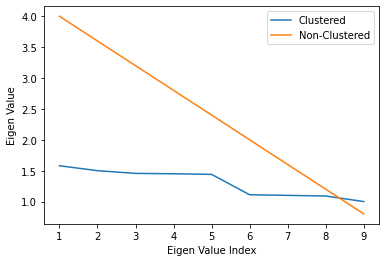

In [5]:
# Showing the Distribution of Eigen Values
indices = np.arange(1,clustered_H.shape[0]+1,dtype=np.int64)
plt.plot(indices,eig_val_cl,label="Clustered")
plt.plot(indices,eig_val_ncl,label="Non-Clustered")
plt.legend(loc='upper right')
plt.xlabel('Eigen Value Index')
plt.ylabel('Eigen Value')
plt.show()

In [6]:
# Obtain the solutions from the Conjugate Desecent method

it_cl,ans_cl,iterates_cl = conjugate_gradient(clustered_H,b_clustered,initial_point)
it_ncl,ans_ncl,iterates_ncl = conjugate_gradient(non_clustered_H,b_non_clustered,initial_point)

print("Iterations taken to converge (Clustered Hessian) = " + str(it_cl))
print("Iterations taken to converge (Non-Clustered Hessian) = " + str(it_ncl))

Iterations taken to converge (Clustered Hessian) = 4
Iterations taken to converge (Non-Clustered Hessian) = 8


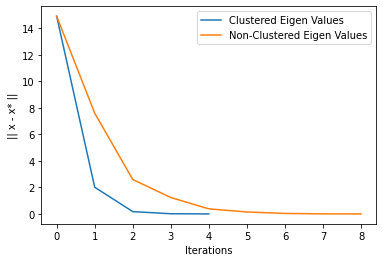

In [8]:
distance_to_optima_cl = []
distance_to_optima_ncl = []

for i in range(len(iterates_cl)):
    distance_to_optima_cl.append(np.linalg.norm(iterates_cl[i]- optimal_solution_clustered))

for i in range(len(iterates_ncl)):
    distance_to_optima_ncl.append(np.linalg.norm(iterates_ncl[i]-optimal_solution_non_clustered))

indices_1 = np.arange(len(distance_to_optima_cl))
plt.plot(indices_1,distance_to_optima_cl,label='Clustered Eigen Values')
indices_2 = np.arange(len(distance_to_optima_ncl))
plt.plot(indices_2,distance_to_optima_ncl,label='Non-Clustered Eigen Values')

plt.xlabel("Iterations")
plt.ylabel("|| x - x* ||")
plt.legend(loc='upper right')
plt.show()


### Iterations

| Eigen Value Distribution 	|  Iterations 	|
|---	|---	|
|  Clustered Eigen Values Hessian 	|   4	| 
|  Non-Clustered Eigen Values Hessian 	|   8	|   	

From the plot above above we see
- The convergence when  H has Non-Clustered Eigen Values is slower compared to the case eigen values are Clustered.

- We could see a case of steep decrease in the error plot when H has Clustered Eigen Values, The decrease in error with iterations is much uniform in the Non-Clustered Case.

### Question 2

 Your start-up will face the cash requirements shown in Table 1 in the next eight quarters(positive entries represent cash needs while negative entries represent cash surpluses).The company has three borrowing possibilities.

|   Q1	|   Q2	|  Q3 	|   Q4	|   Q5	| Q6  | Q7 | Q8 |  
|---	|---	|---	|---	|---	|---  |--- |--- |
|   100	|   500	|  100 	|  -600 	|  -500 	|  200  | 600   | -900   |

- a 2-year loan available at the beginning of Q1, with a 1% interest per quarter.
- The other two borrowing opportunities are available at the beginning of every quarter: a 6-monthloan with a 1.8% interest per quarter, and a quarterly loan with a 2.5% interest for the quarter.

a)  Write a program that implements the revised simplex algorithm.


In [ ]:
import numpy as np
def revised_simplex_method(A,b,c,b_vars,nb_vars):

    final_ans = np.zeros((len(b_vars)+len(nb_vars),))
    iterations = 0
    while True:
        
        print("Basic Variables bef =" + str(b_vars))
        print("Non Basic Variables bef = " + str(nb_vars))

        B = A[:,b_vars]
        N = A[:,nb_vars]
        c_B = c[b_vars,:]
        c_N = c[nb_vars,:]

        print(B.shape)
        print(b.shape)
        x_B = np.linalg.solve(B,b)
        lambda_ = np.linalg.solve(B.T,c_B)
        s_N =c_N - np.matmul(N.T,lambda_)

        print("x_B = " + str(x_B) )
        print("lambda = " + str(lambda_))
        print("s_N = " + str(s_N))

        if np.all(s_N>=0) :
            final_ans[b_vars] = x_B.squeeze(1)
            return True,final_ans

        q = int(np.argmin(s_N,axis=0))
        A_q = np.expand_dims(A[:,nb_vars[q]],axis=1)
        d = np.linalg.solve(B,A_q)

        print("q = " + str(q))
        print("d = " + str(d))

        if np.all(d<=0):
            print("Feasible Region Unbounded")
            return False,np.zeros((len(b_vars)+len(nb_vars),)) 

        x_q = np.inf
        p = x_B.shape[0]
        d_positive = d>0
        for i in range(x_B.shape[0]):
            if d_positive[i,0]:
                ratio = x_B[i,0] / d[i,0]
                if ratio < x_q:
                    x_q = ratio
                    p = i
        
        tmp = b_vars[p]
        b_vars[p] = nb_vars[q]
        nb_vars[q] = tmp

        b_vars.sort()
        nb_vars.sort()

        print("Basic Variables = " + str(b_vars))
        print("Non Basic Variables = " + str(nb_vars))
        print("---------")



In [ ]:
def find_initial_point(A,b,c):
    
    e = np.zeros((A.shape[1]+A.shape[0],1))
    e[A.shape[1]:,:] = 1
    print(e)
    A_new = np.zeros((A.shape[0],A.shape[1]+A.shape[0]))
    A_new[:A.shape[0],:A.shape[1]] = A.copy()

    for i in range(b.shape[0]):
        if b[i,0] < 0:
            A_new[i,A.shape[1]+i] = -1
        else:
            A_new[i,A.shape[1]+i] = 1
    print(A_new)
    
    b_vars = [ i for i in range(A.shape[1],A.shape[1]+A.shape[0]) ]
    nb_vars = [ i for i in range(A.shape[1])]
    flag,solution = revised_simplex_method(A_new,b,e,b_vars,nb_vars)
    return flag,solution
    
    

In [ ]:
'''A = np.array([[1,1,1,0],[2,0.5,0,1]])
b = np.array([[5],[8]])
c = np.array([[-4],[-2],[0],[0]])'''

'''A = np.array([[10,20,1,0],[8,8,0,1]])
b = np.array([[120],[80]])
c = np.array([[-12],[-16],[0],[0]])'''
'''
A = np.array([[1,1,-1,0,0],[1,-1,0,1,0],[3,1,0,0,1]])
b = np.array([[1],[0],[6]])
c = np.array([[-2],[-1],[0],[0],[0]])'''
'''A = np.array([[2,1,1,0],[1,2,0,1]],dtype=np.float32)
b = np.array([[12],[9]],dtype=np.float32)
c = np.array([[-1],[-1],[0],[0]],dtype=np.float32)'''
'''A = np.array([[-3,2,1,1],[-2,1,1,3]],dtype=np.int64)
b = np.array([[7],[1]],dtype=np.int64)
c = np.array([[1],[1],[-1],[-1]],dtype=np.int64)'''
 
'''A = np.array([[2,1,1,1],[1,-1,-1,1]])
b = np.array([[2],[-1]])
c = np.array([[3],[1],[1],[0],[0]])'''

'''A = np.array([[1,1,-1,0,0],[2,-1,0,1,0],[0,1,0,0,1]])
b = np.array([[1],[1],[2.0/3]])
c = np.array([[6],[3],[0],[0],[0]])
'''
'''flag,point = get_initial_point(A,b,c)
if flag == False:
    print("Could not Find an Initial Feasible Point. No solution for the LPP problem")
else:
    b_vars =[]
    nb_vars = []

    for i in range(point.shape[0]- A.shape[0]):
        if point[i]==True:
            nb_vars.append(i)
        else:
            b_vars.append(i)

    ans = revised_simplex(A,b,c,b_vars,nb_vars)
    print(ans)'''

'''A = np.array([[1,1,1,-1,0,0],[1,-2,0,0,-1,0],[0,0,1,0,0,-1]])
b = np.array([[1000],[0],[340]])
c = np.array([[10],[15],[25],[0],[0],[0]])'''

'''A = np.array([[4,3,1,0],[2,1,0,1]])
b = np.array([[240],[100]])
c = np.array([[7],[5],[0],[0]])'''
'''
b_vars = [2,3]
nb_vars = [0,1]
'''

'''A = np.array([[1,1,1,0],[2,1,0,1]])
b = np.array([[12],[16]])
c = np.array([[-40],[-30],[0],[0]])'''


A = np.array([ [ 2, 3, 0],[0, 2, 5],[3, 2, 4] ])

b = np.array([[8],[10],[15]])
c = np.array([[-3],[-5],[-4]])

flag,initial_solution = find_initial_point(A,b,c)
if (not np.all(np.isclose(initial_solution[A.shape[1]:],np.zeros((A.shape[0],)))))or(not flag):
    print("No Initial Feasible Solution; Solution doesnt exist")
else:
    b_vars = []
    nb_vars = []


    for i in range(A.shape[1]):
        if initial_solution[i] == 0.0:
            nb_vars.append(i)
        else:
            b_vars.append(i)
    print("#############")
    flag,ans = revised_simplex_method(A,b,c,b_vars,nb_vars)
    if flag:
       print(ans) 

#ans = revised_simplex_method(A,b,c,b_vars,nb_vars)
#print(ans)


b) Solve the above LP using your program and report the final results.

c)   Use  PuLP  and  scipy.optimize.linprog  to  verify  your  answer.   Change  the  optimization algorithm  used  by  the  solver  -  try  interior  point,  revised-simplex  and  dual-simplex.   Comment  on findings.

#### PULP

In [ ]:
from pulp import *

model = LpProblem("FurnitureProblem", LpMaximize)

x1 = LpVariable("tables", 0, None, LpInteger)
x2 = LpVariable("chairs", 0, None, LpInteger) 
x3 = LpVariable("bookcases", 0, None, LpInteger)

In [ ]:
model += 40 * x1 + 30 * x2 + 45 * x3 
model += 2 * x1 + 1 * x2 + 2.5 * x3 <= 60, "Labour"
model += 0.8 * x1 + 0.6 * x2 + 1.0 * x3 <= 16, "Machine"
model += 30 * x1 + 20 * x2 + 30 * x3 <= 400, "wood"
model += x1 >= 10, "tables"

In [ ]:
# The problem is solved using PuLP's choice of Solver
model.solve()

# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)

### scipy.optimize

In [ ]:
from scipy.optimize import linprog

c = np.array([2,1])
A_ub = np.array([[-1,1],[-1,-1],[1,-2]])
b_ub = np.array([1,-2,4])
bounds = (0,None)
method = 'revised simplex'
ans = linprog(c,A_ub,b_ub,bounds=bounds,method=method)


In [ ]:
ans

### Question 3

a) Consider the problem

$$
min \text{  } x_{1}^{2}+ 2x_{2}^{2} − 2x_{1}−6x_{2}−2x_{1}x_{2},
$$

such that
$$
x_{1} + x_{2} \le 2
$$
$$
-x_{1} + 2x_{2} \le 2

$$

$$
x_{1},x_{2} >= 0 
$$

Solve geometrically (Plot the geometry and solution points to visualize)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


d = np.linspace(0,4,1000)
x1,x2 = np.meshgrid(d,d)

plt.imshow( (( (x1 + x2) <= 2) & ((-x1 + 2*x2) <= 2) & (x1>=0) & (x2>=0) ).astype(int) , 
                extent=(x1.min(),x2.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.3)

x1_ = np.linspace(0,4,500)
x2_1 = 2 - x1_ 
x2_2 = (2 + x1_)/2

z = x1**2 + 2*(x2**2) - 2*x1 - 6*x2 - 2*x1*x2 

cs = plt.contour(x1,x2,z,levels=47)
plt.plot(x1_,x2_1, label=r'$x1+x2\leq2$')
plt.plot(x1_,x2_2, label=r'$-x1+2x2\leq2$')
plt.clabel(cs,inline=True, fontsize='smaller')
plt.xlim(0,4)
plt.ylim(0,4)

plt.show()

b) Implement the active set method for quadratic programs (Algo 16.3 in Nocedal and Wright(2006)).

In [ ]:

def create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,point):
    
    KKT_matrix = np.zeros((G.shape[0]+len(active_indices),G.shape[1]+len(active_indices)))
    KKT_matrix[:G.shape[0],:G.shape[1]] = G.copy()
    KKT_matrix[:G.shape[0],G.shape[1]:] = A_ne[active_indices].T
    KKT_matrix[G.shape[0]:,:G.shape[1]] = A_ne[active_indices]
    
    rhs = np.zeros((c.shape[0]+b_ne[active_indices].shape[0],1))
    Gx_plus_c = np.matmul(G,point) + c
 
    Ax_minus_b  = np.matmul(A_ne[active_indices],point) - b_ne[active_indices]
    rhs[:c.shape[0],:] = Gx_plus_c
    rhs[c.shape[0]:,:] = Ax_minus_b
    
    return KKT_matrix,rhs

def compute_step_length(p,A_ne,b_ne,active_indices,current_point):
    step_length = 1.0

    for i in range(A_ne.shape[0]):
        if i not in active_indices:
            if (np.all(np.matmul(A_ne[i,:],p) < 0)):
                numerator = b_ne[i,0] - np.matmul(A_ne[i,:],current_point)
                denominator = np.matmul(A_ne[i,:],p)
                #print("Numerator = " + str(numerator))
                #print("Denominator = " + str(denominator))
                step = float(numerator/denominator)
                step_length = min(step,step_length)
    
    return step_length


def active_set_method(G,c,A_ne,b_ne,initial_point):

    #  A_ne , b_ne , H , initial_point

    current_point = initial_point.copy()
    reached_new_point = True
    active_indices = []
    #print(active_indices)
    iterations = 0
    while True:
        if reached_new_point:
            Ax =  np.matmul(A_ne,current_point)
            Ax_diff = (Ax - b_ne).squeeze(1)
            active_indices = np.where(Ax_diff==0)[0].tolist()
        
        mat = create_KKT_Matrix(G,A_ne,b_ne,c,active_indices,current_point)
        sol_vector = np.linalg.solve(mat[0],mat[1])
        
        #print(sol_vector)
        
        p = sol_vector[:G.shape[0],:]
        lambda_ = sol_vector[G.shape[0]:,:]
    
        #print("current_point = " + str(current_point))
        #print("increment = " + str(p))
        #print("lambda = " + str(lambda_))
        
        if ( np.all(np.isclose(p,np.zeros((p.shape[0],p.shape[1]))))):
            
            reached_new_point=False
            if np.all(lambda_>=0):
                return iterations,current_point
            else:
                rm_constraint_idx = int(np.argmin(lambda_,axis=0))
                del active_indices[rm_constraint_idx]
        else:
            alpha = compute_step_length(-p,A_ne,b_ne,active_indices,current_point)  
            #print("Alpha value =" + str(alpha) )
  
            new_point = current_point + alpha*(-p)
            current_point = new_point
            reached_new_point=True
        #print("----------")
        iterations+=1


c) Choose  three  initial  starting  points:  
- one  in  the  interior  of  the  feasible  region
- one  at the vertex 
- one at a non-vertex point on the boundary of the feasible region.

Comment on the convergence properties

In [ ]:
G = np.array([[2,-2],[-2,4]])
c = np.array([[-2],[-6]])
A_ne = np.array([[-1,-1],[1,-2]])
b_ne = np.array([[-2],[-2]])
initial_point = np.array([[0.5],[0.5]])

it, sol = active_set_method(G,c,A_ne,b_ne,initial_point)
sol

d) Use CVXOPT and solve the above QP. What algorithm does CVXOPT use to solve QP? Understand and comment on your findings.

In [ ]:
from cvxopt import matrix, solvers

P = matrix([[2.0,-2.0],[-2.0,4.0]])
q = matrix([-2.0,-6.0])
G = matrix([[1.0,1.0],[-1.0,2.0]])
h = matrix([2.0,2.0])

solution = solvers.qp(P,q,G,h)
solution